##### Numerical Computation: HW10

##### Andrew Pickner

I worked alone on this assignment.

---

In [1]:
# imports
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

# 1

##### (i) one-sided forward difference

In [2]:
def forward(f, a, h):
    return (f(a + h) - f(a)) / h

##### (ii) one-sided backward difference

In [3]:
def backward(f, a, h):
    return (f(a) - f(a - h))/h

##### (iii) central difference

In [4]:
def central(f, a, h):
    return (f(a + h) - f(a - h))/(2*h)

In [5]:
f       = lambda x: np.sin(4.8 * np.pi * x)
f_prime = lambda x: 4.8 * np.pi * np.cos(4.8 * np.pi * x)

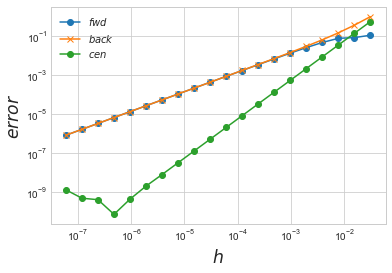

In [6]:
x = 0.2

k_interval = 5, 24

hs = []

forward_error  = []
backward_error = []
central_error  = []

truth = f_prime(x)

for k in range(k_interval[0], k_interval[1] + 1):
    h = 2 ** (-k)
    
    hs.append(h)
    
    forward_val  = forward(f, x, h)
    backward_val = backward(f, x, h)
    central_val = central(f, x, h)
    
    forward_error.append(abs(truth - forward_val))
    backward_error.append(abs(truth - backward_val))
    central_error.append(abs(truth - central_val))

plt.loglog(hs, forward_error, '-o', label='$fwd$')
plt.loglog(hs, backward_error, '-x', label='$back$')
plt.loglog(hs, central_error, '-o', label='$cen$')

plt.xlabel("$h$", fontsize='xx-large')
plt.ylabel("$error$", fontsize='xx-large')

plt.legend()

---

Alright, and now to find the rates of convergence for the three functions we need to solve the following equation for each (for the interval of their specific asymptotic regime): $err(h) \approx Ch^{p}$ or $log(err) = log(C) +p\cdot log(h)$.

In our case, $p$ is this rate of convergence, and on a log-log scale (and from my understanding) should be the slope of the line plotted by $err(h)$ vs. $h$. I've calculated a rough estimate of slope using the max and min error and what appears to be the intervals of asymptotic regime for each function below. Although my plot appears to be sort of similar to yours, my slopes must have been calculated incorrectly. It came as no surprise that both my forward and backward methods produced a similar slope $\approx 30$, the central method produces a slope around half of that. Ultimately I feel like we've really been given the tools to solve this but I'm stuck.

I know that both backward and forward difference errors are bounded like so: $err(h)=\mathcal{O}(h)$,
and likewise, the central difference error is bounded by: $\mathcal{O}(h^2)$.

And although it looks like my graphs reproduce that performance, I suppose I'm not entirely sure how to show it here.

---

In [7]:
i    = 0

# print(max(forward_error))
# print(min(forward_error))

print("slope forward: ", (max(forward_error) - min(forward_error)) / (hs[3] - hs[-1]))

# print(max(backward_error))
# print(min(backward_error))

print("slope backward: ", (max(backward_error) - min(backward_error)) / (hs[i] - hs[-1]))

# print(max(central_error))
# print(min(central_error))

print("slope central: ", (max(central_error) - min(central_error)) / (hs[i] - hs[-4]))

slope forward:  28.278055351827515
slope backward:  31.511476749734516
slope central:  17.523354257869805


# 2

In [8]:
def finite(f, a, h):
    return ( 1 / ( 6 * h ) ) * ( ( 2 * f( x + h ) ) + ( 3 * f(x) ) - ( 6 * f( x - h ) ) + f(x - ( 2 * h ) ) )

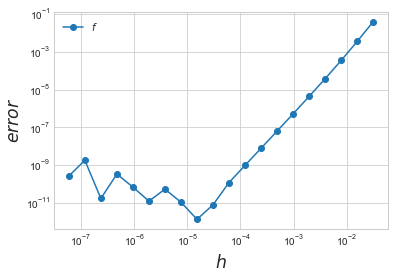

In [9]:
x = 0.2

k_interval = 5, 24

hs = []

finite_error  = []
truth = f_prime(x)

for k in range(k_interval[0], k_interval[1] + 1):
    h = 2 ** (-k)
    
    hs.append(h)
    
    finite_val  = finite(f, x, h)
    
    finite_error.append(abs(truth - finite_val))

plt.loglog(hs, finite_error, '-o', label='$f$')

plt.xlabel("$h$", fontsize='xx-large')
plt.ylabel("$error$", fontsize='xx-large')

plt.legend()

---

As far as rate goes, it initially appears to be way faster then the other functions we previously implement, but I wanted to be sure so I produced a plot below. Also, in order for me to compute the rate of convergence I need to figure out the asymptotic regime.

So, the **asymptotic regime** is the part of the plot where we don't see any oscillation or *wiggle* and it looks linear. It appears from the graph that the asymptotic regime is along the interval: $[2^{-5}, ..., 2^{-19}]$.

Similar to above, I had a tough time getting the actual rate of convergence, but it would appear to be 3rd or 4th order (I assume 3rd because the bonus is finding a 4th?). Thus, by my prior assumption it would hold that the $err(h)=\mathcal{O}(h^{3})$ for the finite difference method.

---

In [10]:
i    = 0
diff = 14

print("h: ", hs[i], " err: ", finite_error[i])
print("h: ", hs[i+diff], " err: ", finite_error[i+diff])

print(max(finite_error))
print(min(finite_error))

print((finite_error[i+diff] - finite_error[i]) / (hs[i+diff] - hs[i]))

h:  0.03125  err:  0.03983202445123091
h:  1.9073486328125e-06  err:  1.2585488207150775e-11
0.03983202445123091
1.3677947663381929e-12
1.2747025837080224


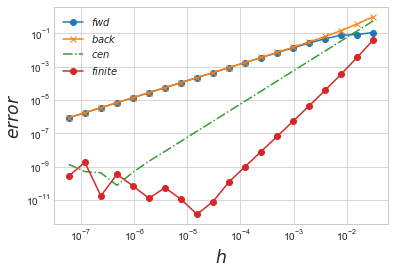

In [11]:
plt.loglog(hs, forward_error, '-o', label='$fwd$')
plt.loglog(hs, backward_error, '-x', label='$back$')
plt.loglog(hs, central_error, '-.', label='$cen$')
plt.loglog(hs, finite_error, '-o', label='$finite$')

plt.xlabel("$h$", fontsize='xx-large')
plt.ylabel("$error$", fontsize='xx-large')

plt.legend()

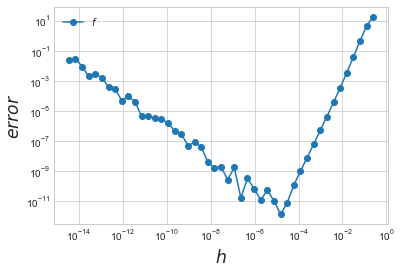

In [12]:
x = 0.2

k_interval = 5//2, 24*2

hs = []

finite_error  = []
truth = f_prime(x)

for k in range(k_interval[0], k_interval[1] + 1):
    h = 2 ** (-k)
    
    hs.append(h)
    
    finite_val  = finite(f, x, h)
    
    finite_error.append(abs(truth - finite_val))

plt.loglog(hs, finite_error, '-o', label='$f$')

plt.xlabel("$h$", fontsize='xx-large')
plt.ylabel("$error$", fontsize='xx-large')

plt.legend()

We just see growing error due to accumulating round-off errors as $h$ goes to $0$.

---

### BONUS:

So the second lecture was really interesting when you got into interpolation and how we could use this to fine tune the accuracy of the derivative. Although I didn't actually get to solving this problem, I did do some preliminary research to give it a try, and it seems like problem 2 is a 3rd-order finite difference equation. So in theory, this method would've converged the quickest, and our error bound would be $\mathcal{O}(h^{4})$.

---

In [13]:
def finite4th(f, a, h):
    pass